In [ ]:
import pandas as pd
from google.colab import files


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [ ]:
def startModel():
  dataset = "travel_times.csv"
  uploaded = files.upload()
  df = pd.read_csv(dataset)
  X = df.iloc[:, [5,6,7,8,11,]]
  y = df['TotalTime']
  model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
  return X_train, X_test, y_train, y_test



In [ ]:
def runModel(X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred

In [ ]:
def MSEL(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  return mse

In [ ]:
metrics = startModel()
predictions = runModel(metrics[0], metrics[1], metrics[2], metrics[3])
MSEL(metrics[3], predictions)

Saving travel_times.csv to travel_times (11).csv


37.46606271722927

In [ ]:
#2
dataset = "house_sales_boston.csv"
uploaded = files.upload()
df2 = pd.read_csv(dataset)

Saving house_sales_boston.csv to house_sales_boston.csv


In [ ]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,98074,47.6168,-122.045


In [ ]:
X = df2.iloc[:, [3,4,5,6,7,8,9,10,11,12,13]]
y = df2['price']
model = LinearRegression()
#data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Price Predictions', y_pred[:5])
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Price Predictions [ 493435.46746005  680275.50066281 1066976.78639978 1432348.09319884
  633420.019943  ]
Mean Squared Error: 60724374790.5569
Mean Absolute Error: 158353.415049739
R-squared: 0.5987942660888942


In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
waterfront,508346.477084
bathrooms,66993.648581
view,62638.830195
floors,46436.242496
condition,15612.392567
sqft_living,176.227227
sqft_above,106.509408
sqft_basement,69.717819
sqft_lot,-0.366089
yr_built,-2981.132942


In [ ]:
X2 = df2[['waterfront', 'bathrooms', 'view', 'bedrooms', 'floors']]
y2 = df2['price']
model = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,
random_state=42)
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
print('Price Predictions', y_pred2[:5])
print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("R-squared:", r2_2)

Price Predictions [ 554556.89881539  721767.46046314  853451.62259986 1029692.93874578
  579015.57565622]
Mean Squared Error: 91948626036.20987
Mean Absolute Error: 195207.8150942175
R-squared: 0.3924957462598344


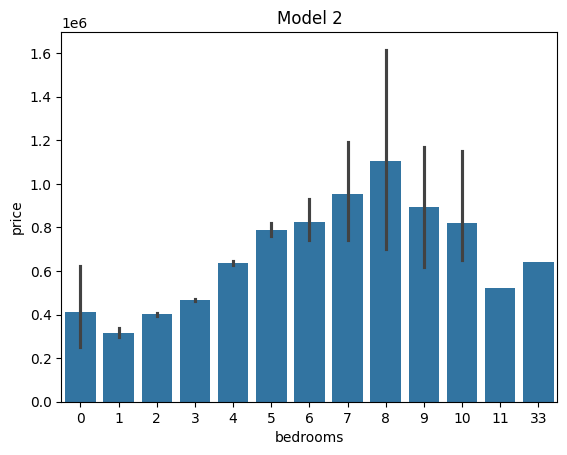

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=df2['bedrooms'], y=y2, data=df2)
plt.title('Model 2')
plt.show()

In [ ]:
X3, y3 = make_blobs(n_samples = 100, centers = 3, cluster_std = 1, n_features = 2)
lst = [1,2,3,5]
for i in lst:
  poly = PolynomialFeatures(degree=i)
  X_poly = poly.fit_transform(X3)
  model = LinearRegression()
  model.fit(X_poly, y3)
  print(model.score(X_poly, y3))
  print(model.predict(poly.fit_transform([[1,2]])))

0.32931282561588027
[0.86966666]
0.5465181276564922
[0.83984575]
0.6278327223351515
[0.79471172]
0.7574980745930477
[0.97694608]
